In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
ano = 2020

In [3]:
# Arquivo calculado com o Geomag 7.0 (https://www.ngdc.noaa.gov/geomag/models.shtml  ou
# https://www.ngdc.noaa.gov/geomag/data/geomag/geomag70_windows.zip)

# data / lat / long / F / Dec / Inc 
dados = np.loadtxt('IGRF.txt')

In [5]:
lat = np.unique(dados[dados[:, 0]==ano, 1])
lon = np.unique(dados[dados[:, 0]==ano, 2])
F = 1e-3 * dados[dados[:, 0]==ano, 3].reshape(len(lon), len(lat)).T
D = dados[dados[:, 0]==ano, 4].reshape(len(lon), len(lat)).T
I = dados[dados[:, 0]==ano, 5].reshape(len(lon), len(lat)).T

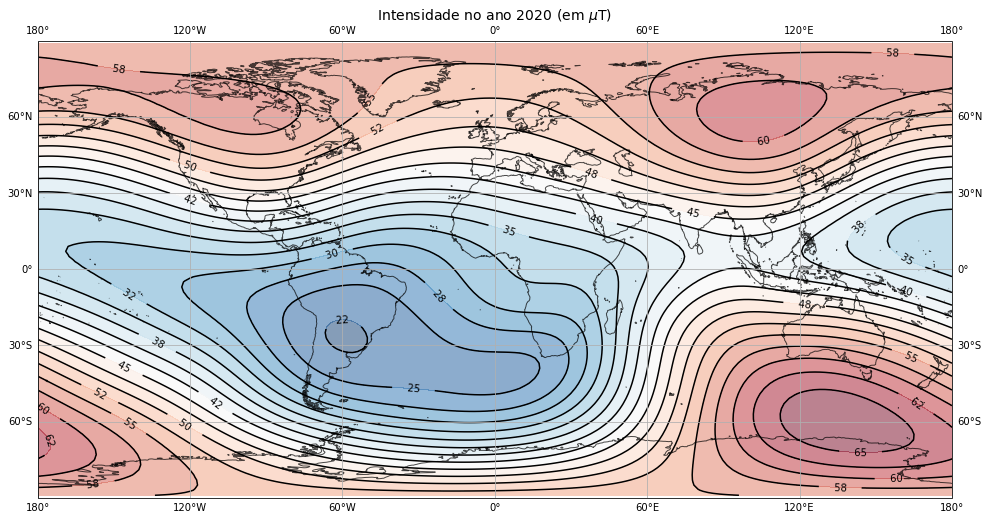

In [6]:
fig = plt.figure(figsize=(13, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
z_filled = plt.contourf(lon, lat, F, 20, transform=ccrs.PlateCarree(), cmap='RdBu_r', alpha=0.5)
z_linhas = plt.contour(lon, lat, F, levels=z_filled.levels, colors=['black'], transform=ccrs.PlateCarree())

ax.clabel(
        z_linhas,  # Typically best results when labelling line contours.
        colors=['black'],
        manual=False,  # Automatic placement vs manual placement.
        inline=True,  # Cut the line where the label will be placed.
        fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
    )



ax.set_global()
ax.coastlines(resolution='50m', alpha=0.7)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.set_title('Intensidade no ano ' + str(int(dados[0,0])) + ' (em $\mu$T)', fontsize=14)

plt.tight_layout()
plt.show()

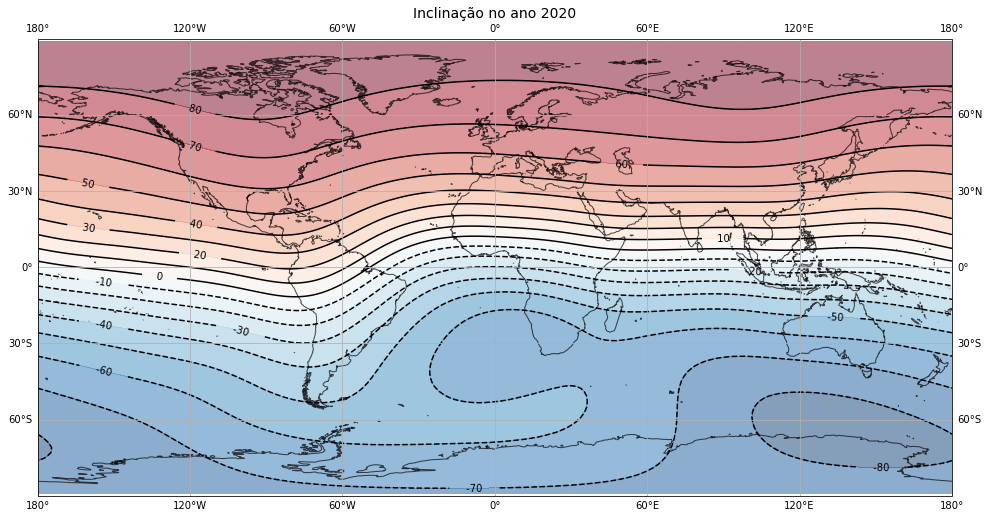

In [7]:
fig = plt.figure(figsize=(13, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
z_filled = plt.contourf(lon, lat, I, 20, transform=ccrs.PlateCarree(), cmap='RdBu_r', alpha=0.5)
z_linhas = plt.contour(lon, lat, I, levels=z_filled.levels, colors=['black'], transform=ccrs.PlateCarree())

ax.clabel(
        z_linhas,  # Typically best results when labelling line contours.
        colors=['black'],
        manual=False,  # Automatic placement vs manual placement.
        inline=True,  # Cut the line where the label will be placed.
        fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
    )

ax.set_global()
ax.coastlines(resolution='50m', alpha=0.7)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.set_title('Inclinação no ano ' + str(int(dados[0,0])), fontsize=14)

plt.tight_layout()
plt.show()

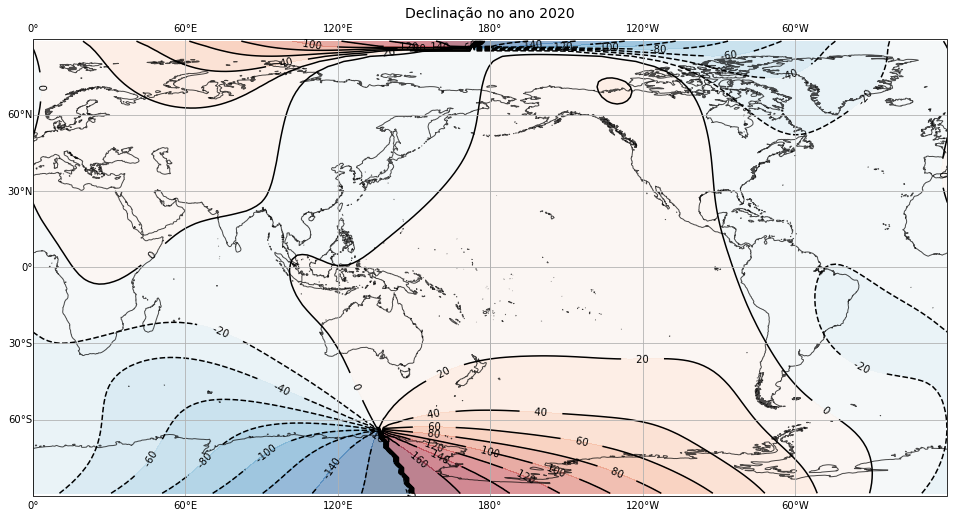

In [8]:
fig = plt.figure(figsize=(13, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
z_filled = plt.contourf(lon, lat, D, 20, transform=ccrs.PlateCarree(), cmap='RdBu_r', alpha=0.5)
z_linhas = plt.contour(lon, lat, D, levels=z_filled.levels, colors=['black'], transform=ccrs.PlateCarree())

ax.clabel(
        z_linhas,  # Typically best results when labelling line contours.
        colors=['black'],
        manual=False,  # Automatic placement vs manual placement.
        inline=True,  # Cut the line where the label will be placed.
        fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
    )



ax.set_global()
ax.coastlines(resolution='50m', alpha=0.7)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.set_title('Declinação no ano ' + str(int(dados[0,0])), fontsize=14)

plt.tight_layout()
plt.show()